# 1. Понимание бизнеса

## 1.1 Цель
Предсказать качество вина

## 1.2 Описание
Эти два набора данных относятся к красному и белому вариантам португальского вина "Винью Верде". Ссылка [Кортес и др., 2009]. Из-за проблем конфиденциальности и логистики доступны только физико-химические (входные данные) и сенсорные (выходные данные) переменные (например, нет данных о сортах винограда, марке вина, цене продажи вина и т.д.).

Эти наборы данных можно рассматривать как задачи классификации или регрессии. Классы упорядочены и не сбалансированы (например, существует гораздо больше нормальных вин, чем отличных или плохих). Алгоритмы обнаружения выбросов могут быть использованы для обнаружения нескольких превосходных или плохих вин. Кроме того, мы не уверены, что все входные переменные являются релевантными. Так что было бы интересно протестировать методы выбора функций.

Два набора данных были объединены, и несколько значений были удалены случайным образом.

[Описание от Kaggle](https://www.kaggle.com/rajyellow46/wine-quality)

# 2. Data Understanding

## 2.1 Import Libraries

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## 2.2 Загрузка данных

In [28]:
df=pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


**Описание переменных**

Для получения дополнительной информации прочитайте [Cortez et al., 2009].
Входные переменные (на основе физико-химических тестов):

1 - фиксированная кислотность<br>
2 - летучая кислотность<br>
3 - лимонная кислота<br>
4 - остаточный сахар<br>
5 - хлориды<br>
6 - свободный диоксид серы<br>
7 - общий диоксид серы<br>
8 - плотность<br>
9 - рН<br>
10 - сульфаты<br>
11 - алкоголь<br>
Выходная переменная (на основе сенсорных данных):<br>
12 - качество (оценка от 0 до 10)

Выражение благодарности:

П. Кортес, А. Сердейра, Ф. Алмейда, Т. Матос и Дж.Рейс.
Моделирование предпочтений вина путем интеллектуального анализа данных по физико-химическим свойствам. В Системах Поддержки Принятия Решений Elsevier, 47(4):547-553, 2009.

## 2.3 Статистика и визуализации

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### 2.3.1. Смотрим на распределение красных и белых вин 

<AxesSubplot:xlabel='type', ylabel='count'>

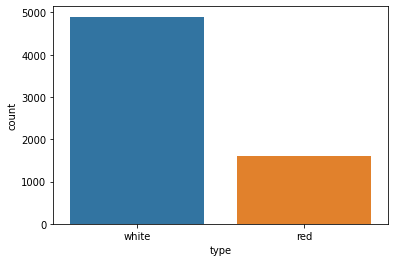

In [16]:
sns.countplot(df['type'])

### 2.3.2. Смотрим на распределение вин по качеству

<AxesSubplot:xlabel='quality', ylabel='count'>

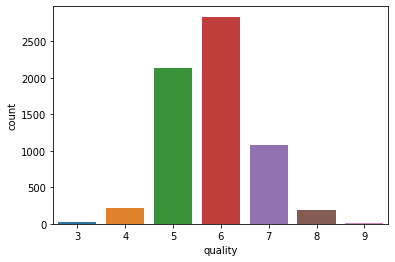

In [17]:
sns.countplot(df['quality'])

### 2.4.3 Тепловая карта корреляции может дать нам понимание того, какие переменные важны

<AxesSubplot:>

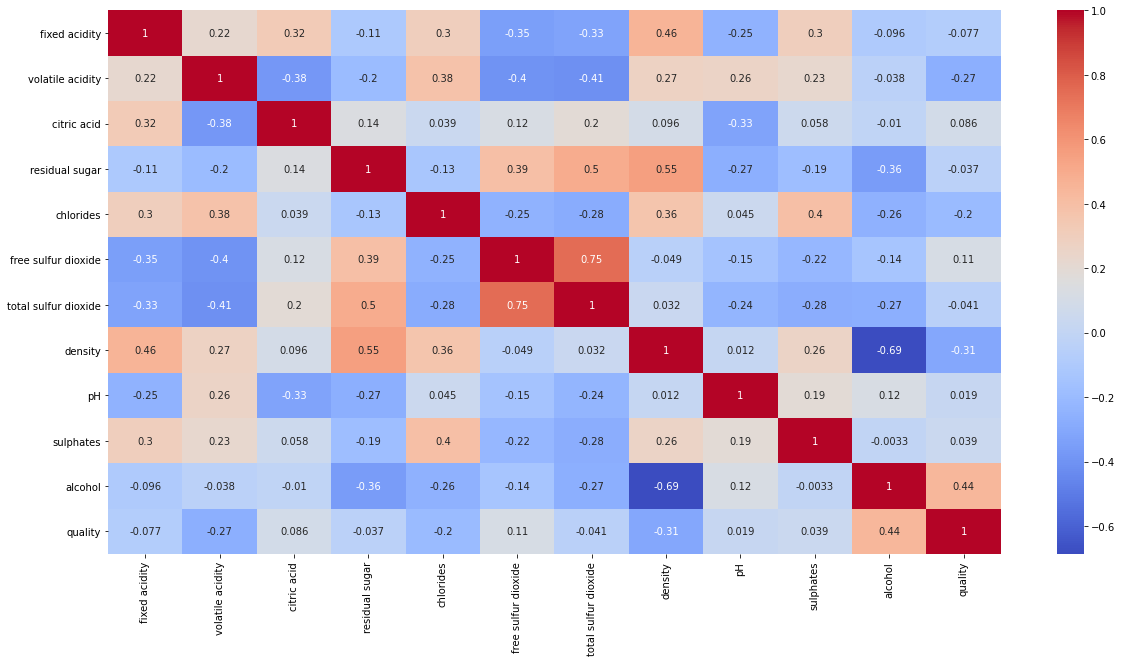

In [18]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap='coolwarm')

# 3. Data Preparation

### 3.1. Проверяем на нулевые значения и заполняем средним

In [32]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [37]:
feature_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]

In [38]:
df[feature_with_na].head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,pH,sulphates
0,7.0,0.27,0.36,20.7,0.045,3.00,0.45
1,6.3,0.30,0.34,1.6,0.049,3.30,0.49
2,8.1,0.28,0.40,6.9,0.050,3.26,0.44
3,7.2,0.23,0.32,8.5,0.058,3.19,0.40
4,7.2,0.23,0.32,8.5,0.058,3.19,0.40
5,8.1,0.28,0.40,6.9,0.050,3.26,0.44
6,6.2,0.32,0.16,7.0,0.045,3.18,0.47
7,7.0,0.27,0.36,20.7,0.045,3.00,0.45
8,6.3,0.30,0.34,1.6,0.049,3.30,0.49
9,8.1,0.22,0.43,1.5,0.044,3.22,0.45


In [39]:
for feature in feature_with_na:
    df[feature].fillna(df[feature].mean(), inplace=True)
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 3.2. Смотрим на выбросы

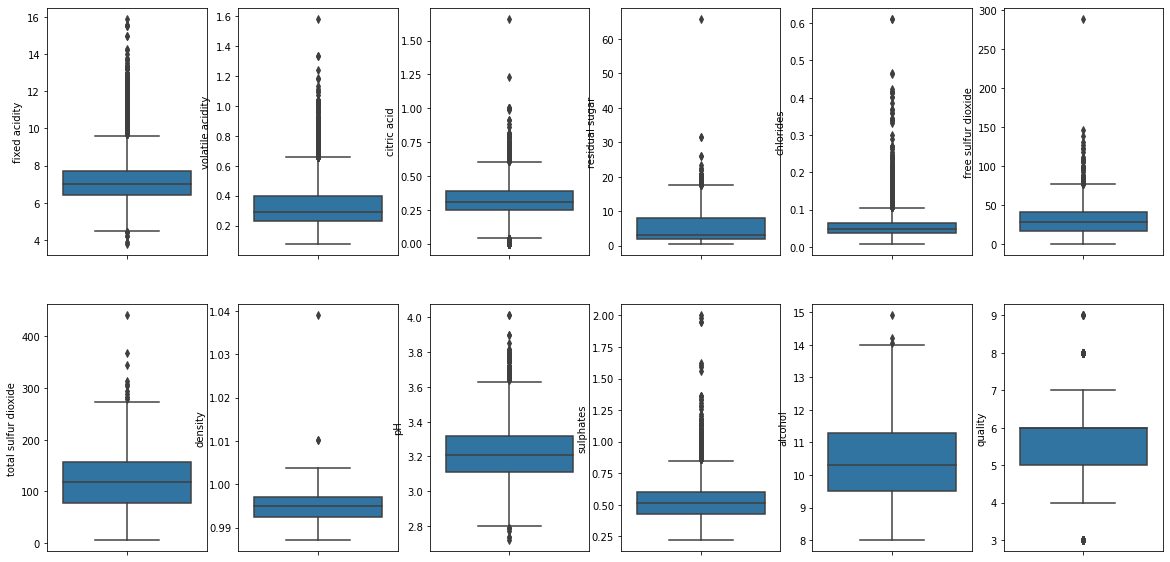

In [12]:
fig,ax = plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for col, value in df.items():
    if col!='type':
        sns.boxplot(y=col,data=df,ax=ax[index])
        index+=1
    

### 3.3 Разделение данных на принзаки и целевую переменную

In [42]:
X=df.drop(columns=['type','quality'])
y=df['quality']

# 4. Моделирование
Теперь мы выберем модель, которую хотели бы попробовать. Используем обучающий набор данных для обучения модели и затем проверим ее с помощью тестового набора.

## 4.1 Выбор модели
Хорошей отправной точкой является логистическая регрессия.

In [51]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

## 4.2 Обучение модели

In [52]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=43)
model.fit(X_train,y_train)
print("Accuracy", model.score(x_test,y_test)*100)

Accuracy 46.33846153846154


# 5. Оценка
Теперь мы собираемся оценить модель

## 5.1 Модель
Мы можем оценить точность модели, используя набор для валидации, где мы знаем фактический результат. Этот набор данных не использовался для обучения, поэтому он абсолютно новый для модели.

Затем мы сравниваем точность с точностью при использовании модели на тренировочных данных. Если разница между ними значительна, это свидетельствует о переобучении. Мы стараемся избегать этого, потому что это означает, что модель не будет хорошо обобщаться на новые данные (будет работать плохо)

In [53]:
score=cross_val_score(model,X,y,cv=5)
print("CV Score", np.mean(score)*100)

CV Score 45.66767335820453


#### Score низкий поэтому вернемся на шаг 4 и применим RandomForestClassifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()


#### обучим модель из шага 4.2

In [56]:
model.fit(X_train,y_train)
print("Accuracy", model.score(x_test,y_test)*100)

Accuracy 67.32307692307693


#### проведем оценку модели из шага 5.1

In [57]:
score=cross_val_score(model,X,y,cv=5)
print("CV Score", np.mean(score)*100)

CV Score 50.23792266240302


# 6. Развертывание

#### Если результат устраивает
#### Развертывание в данном случае означает направление Ноутбука проверяющим Нетологии для оценки CrispDM-подхода